# chapter 05.


In [115]:
import matplotlib
#matplotlib.rc('font', family = "NanumBarunGothicOTF")

%matplotlib inline

In [116]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets


In [117]:
# iris dataset import

def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds["data"], columns=ds['feature_names'])
    code_species_map = dict(zip(range(3), ds['target_names']))
    df['species'] = [code_species_map[c] for c in ds['target']]
    return df

df = get_iris_df()
df_iris = df

## 5.3 원형차트

[usage]
- EDA
- Binary classification result showing

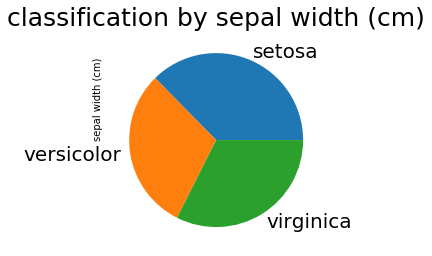

In [118]:
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')
# plt.savefig('iris_pie_for_one_variable.png')
plt.title('classification by '+var, fontsize=25 )
plt.show()
plt.close()

Text(0.5, 1.0, '측정값 Total Measurements, by Species')

/home/bitteschon/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bitteschon/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bitteschon/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bitteschon/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/bitteschon/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/bitteschon/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.

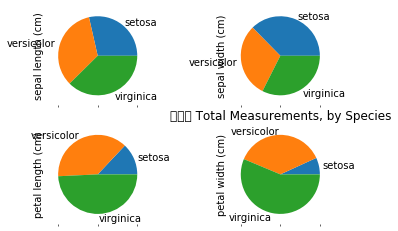

In [119]:
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(kind='pie', subplots=True,
layout=(2,2), legend=False)
plt.title('측정값 Total Measurements, by Species')


## 5.4 막대그래프
목적 : 상대적인 크기 비교를 위하여

In [120]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0.5, 1.0, 'classification by sepal width (cm)')

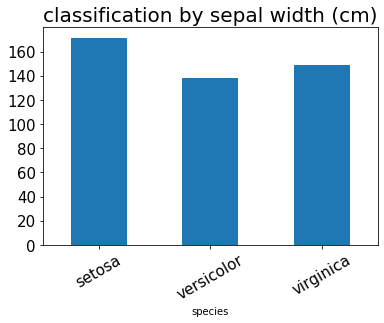

In [121]:
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='bar', fontsize=15, rot=30)

plt.title('classification by '+ var, fontsize=20)
#plt.close()



Text(0.5, 0.98, 'iris_bar_for_each_variable')

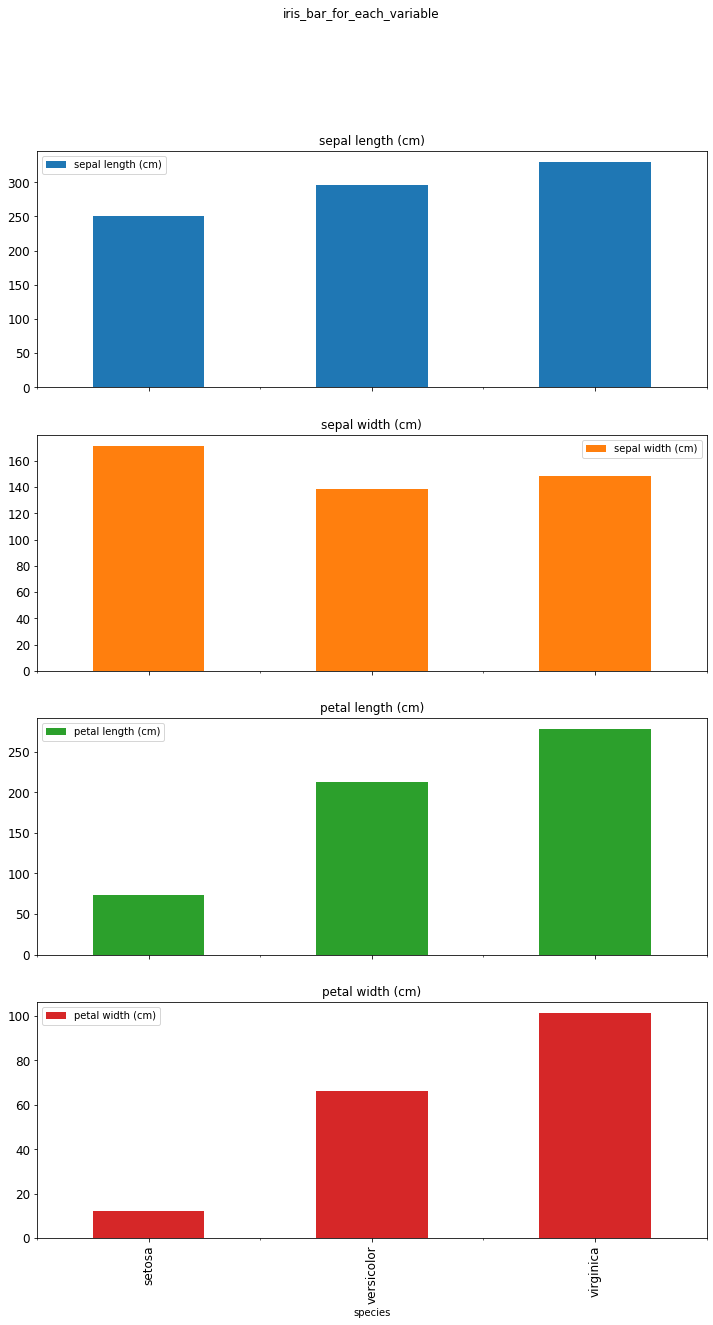

In [122]:
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(kind='bar', subplots=True, fontsize=12, figsize=(12,20))


plt.suptitle('iris_bar_for_each_variable', fontsize=12)
#plt.close()

## 5.5 히스토그램
[histogram](https://ko.wikipedia.org/wiki/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8)
- 데이터의 중요한 특성을 잘 보여준다.
- 실수와 정수 모두 사용가능하다.
- 산포도와 달리 수치가 하나만 있어도 사용가능하다.


- 이상치가 있는경우 이상하게 그려질 수 있다. (대부분 0~1 값, 이상치 1개 10,000인 경우) : 이상치 제거
- 칸 수와 크기를 유의하자
    - 칸이 너무 넓으면, 세부 분포가 뭉뚱그려진다.
    - 칸이 너무 좁으면, 분포의 큰 그림을 나타내지 못한다.
    
    
- 히스토그램의 패턴은 다음과 같다
    - 좌우 대칭(symmetric)
    - 왼쪽 기울어짐(skewed left) 또는 오른쪽(right)
    - 단봉형(unimodal), 두꼭대기(bimodal) 또는 복합(multimodal).

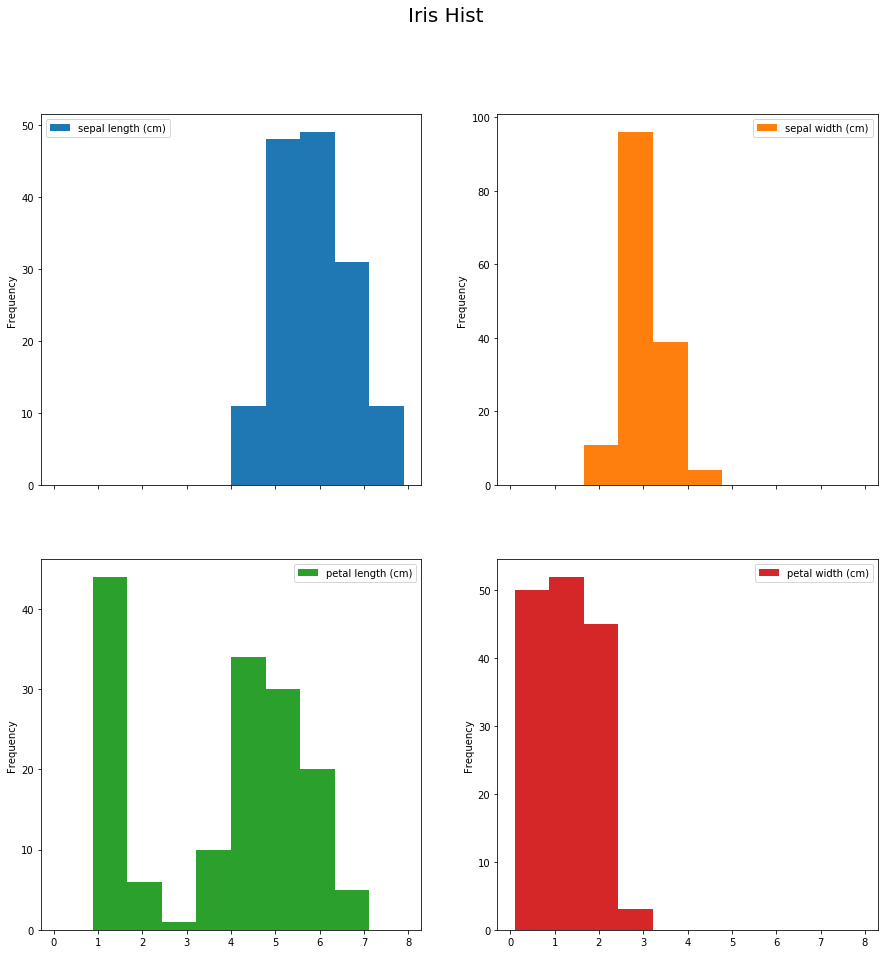

In [123]:
df.plot(kind='hist',subplots=True, layout=(2,2), figsize=(15,15))
plt.suptitle('Iris Hist', fontsize=20)
plt.show()

Text(0.5, 0.98, 'petal length by species')

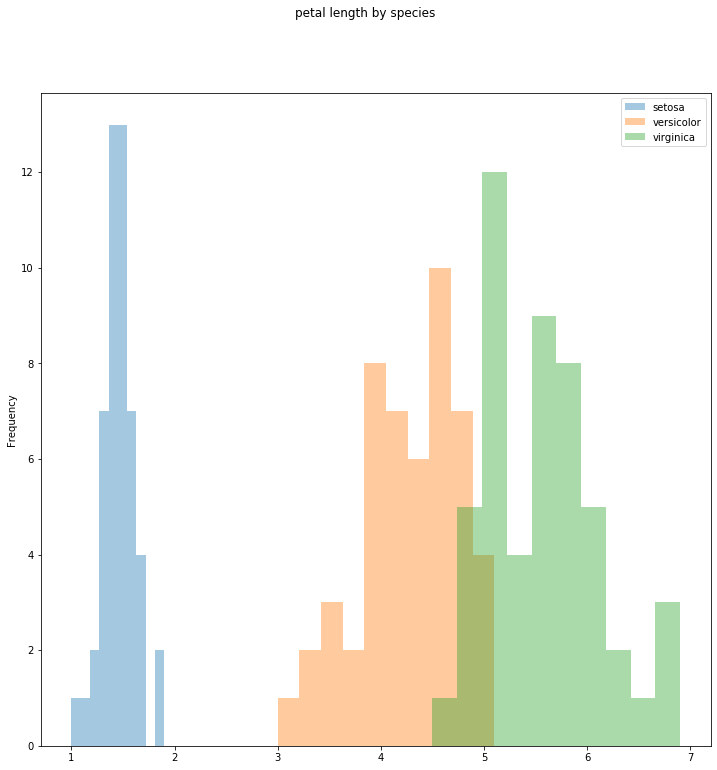

In [124]:
for spec in df['species'].unique():
    forspec = df[df['species']==spec]
    df[df['species']=='setosa']
    forspec['petal length (cm)'].plot(kind='hist', alpha=0.4, label=spec, figsize=(12,12))
    
plt.legend(loc='upper right')
plt.suptitle('petal length by species')

## 5.6 평균, 표준편차, 중간값, 백분위

- mean
- standard deviation
- median
- Percentile

때때로, 대표값으로 데이터 분포를 요약해야할 때가 있다.
대개, 종모양의 가우스 분포라 가정하고, 종의 높이와 너비를 표현한다.
하기 두 종류를 사용한다.

- 평균/표준편차
    - 데이터의 이상치가 큰 문제가 될 수 있다.
    - A few outliers could distort the meaning of the whole data(mean/std)
        - mean을 구하기 전, outlier를 걸러냄으로 해결
- 중간값, 25% 백분위수, 75% 백분위수 : 가장 대표적이고 전형적인 값
    - 한쪽으로 치우쳐진 종 모양의 분포에서 중간값은 종의 정중앙에 위치하지 않는다.
    - 적어도 전체 값의 중앙에 위치한다는 의미는 남아있다.
    
    
* 하지만 경영 관점에서 모든 값이 중요하고, 따라서 평균값을 사용하는 것이 더 적합할 때도 있다.

In [125]:
col = df['petal length (cm)'] 
perc25 = col.quantile(0.25)
perc75 = col.quantile(0.75)
clean_avg = col[(col>perc25) & (col < perc75)].mean()

## 5.7 Boxplot
: outlier를 아주 명확하게 보여준다.

- median(중앙값)
- quartile(사분위수)
- min
- max

In [126]:
col = 'sepal length (cm)'
df['ind']= pd.Series(df.index).apply(lambda i: i% 50)
#df.pivot('ind','species')[col].plot(kind='box')

In [127]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,ind
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,3
4,5.0,3.6,1.4,0.2,setosa,4


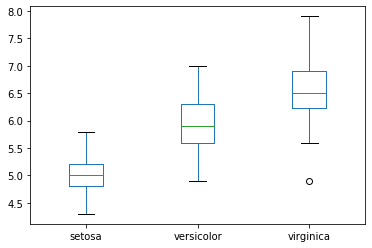

In [128]:
df.pivot('ind','species')[col].plot(kind='box')

## 5.8 Scatter plot
: 처음 데이터셋을 접할때, 산포도로 분포를 보자.

- 2변량의 관계를 아는 데 편리


- option
    - c : color
    - s : size
    - marker : 점의 모양
    - alpha : 투명도

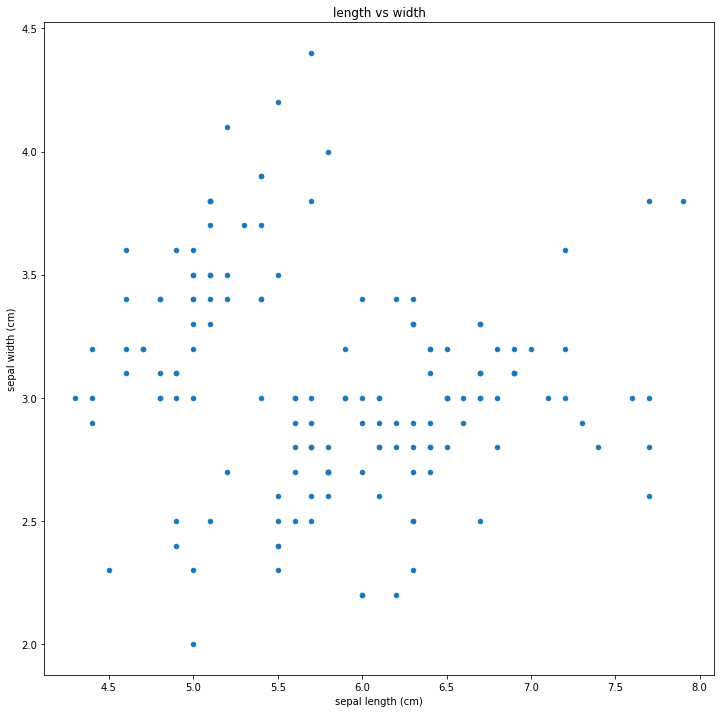

In [137]:
df.plot(kind="scatter", figsize=(12,12),
       x = 'sepal length (cm)', y = "sepal width (cm)")
plt.title('length vs width')
plt.show()

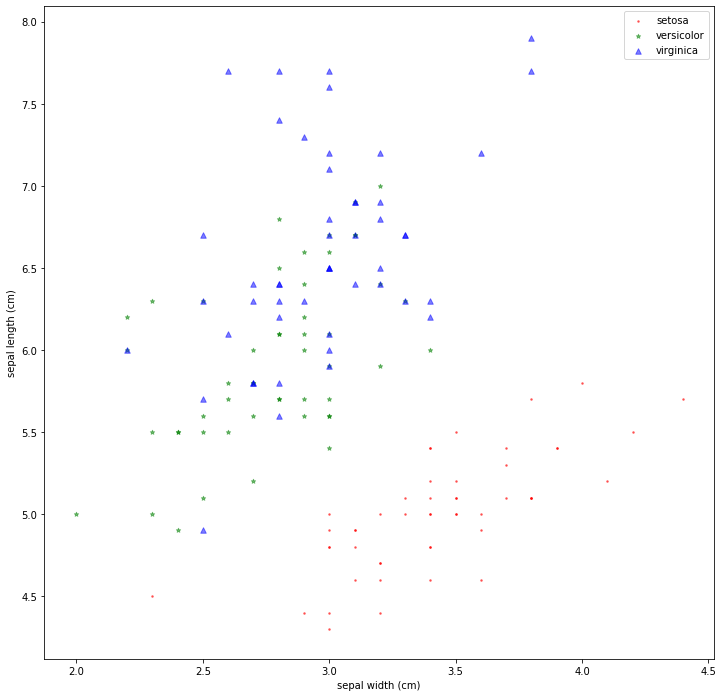

In [138]:
plt.close()
colors = ['r','g','b']
markers = ['.','*','^']

fig, ax = plt.subplots(1,1)

for i, spec in enumerate(df['species'].unique()):
    ddf = df[df['species'] == spec]
    ddf.plot(kind="scatter",
            x='sepal width (cm)', y ='sepal length (cm)',
            alpha=0.5, s=10*(i+1), ax=ax,
            color=colors[i], marker=markers[i], label=spec, figsize=(12,12))
    
plt.legend()
plt.show()
    

## 5.9 Scatter plot with logarithmic axis

- 산포도에 로그를 취하는 것은 흔히 사용하는 기법
- 값이 전부 양수이면서, 크기 차이가 심하게 나는 경우 보정하는데 유용


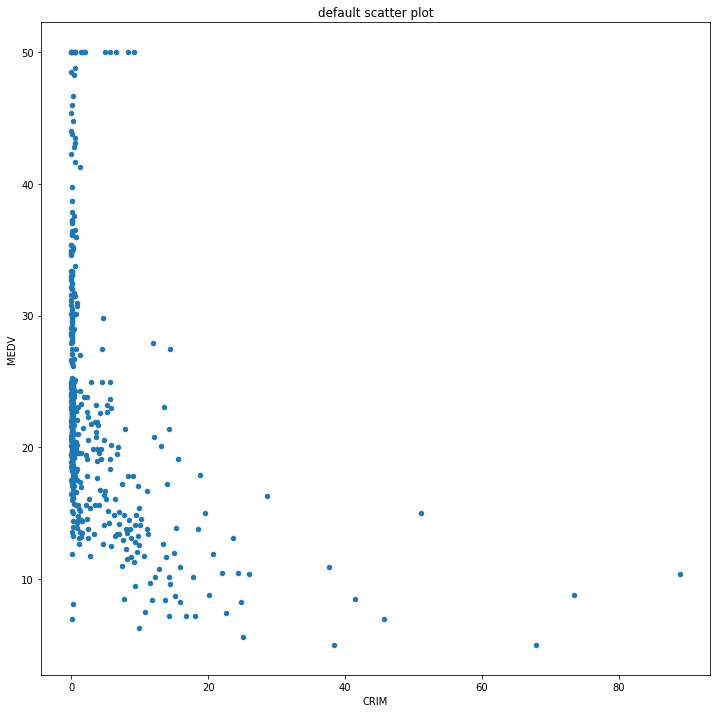

In [142]:
import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt

# dataframe
bs = ds.load_boston()
df_crime = pd.DataFrame(bs.data, columns= bs.feature_names)
df_crime['MEDV'] = bs.target

# scatter plot without logarithmic axis
df_crime.plot(x='CRIM', y='MEDV', kind='scatter', figsize=(12,12))
plt.title('default scatter plot')
plt.show()

### Scatter plot with logarithmic axis

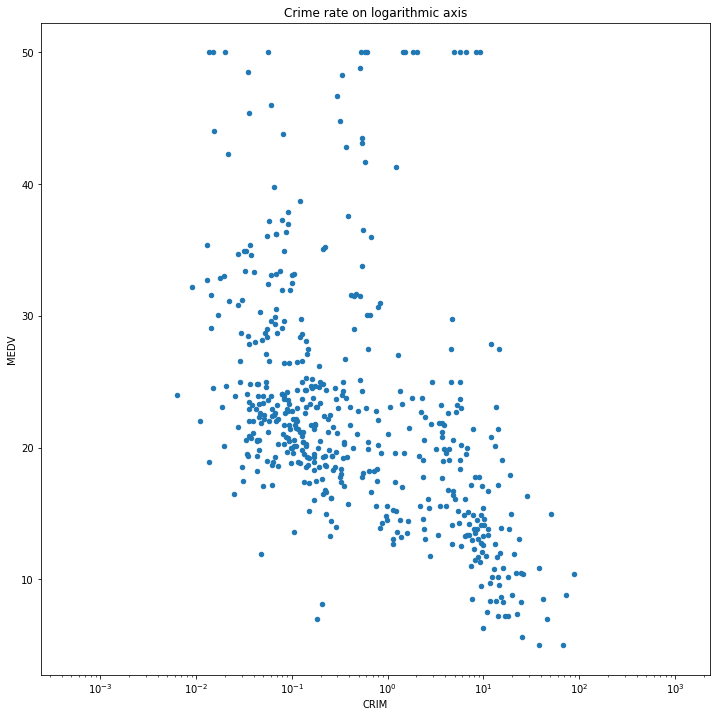

In [143]:
df_crime.plot(x='CRIM', y='MEDV', kind='scatter', logx=True, figsize=(12,12))
plt.title('Crime rate on logarithmic axis')
plt.show()

#### Scatter plot with logarithmic axis
- x축의 눈금이 불규칙적으로 바뀐다.
    - 로그를 씌우면 값이 작은 구간은 확대되고, 큰 구간은 축소되는 효과가 있다.

- 단, 모든 데이터가 0보다 큰 경우에만 로그를 취할 수 있다.
    - 값에 0이 있는 경우, 모든 데이터에 1을 더해서 해결하기도 한다.
    - 값에 음수가 있는 경우는 이 방법을 사용하기에 적합하지 않다.

> 로그 취하기전은 큰 상관관계가 없어보였으나, 로그 후, 음의 상관관계(반비례)인 것이 확인 가능하다.

## Scatter Matrix

- scatter plot은 두 종류의 변수만 시각화가 가능하다.
- 더 많은 변수들을 비교하려면 여러개의 산포도를 그려야하는데, 이를 산포 행렬(scatter matrix)라고 한다.


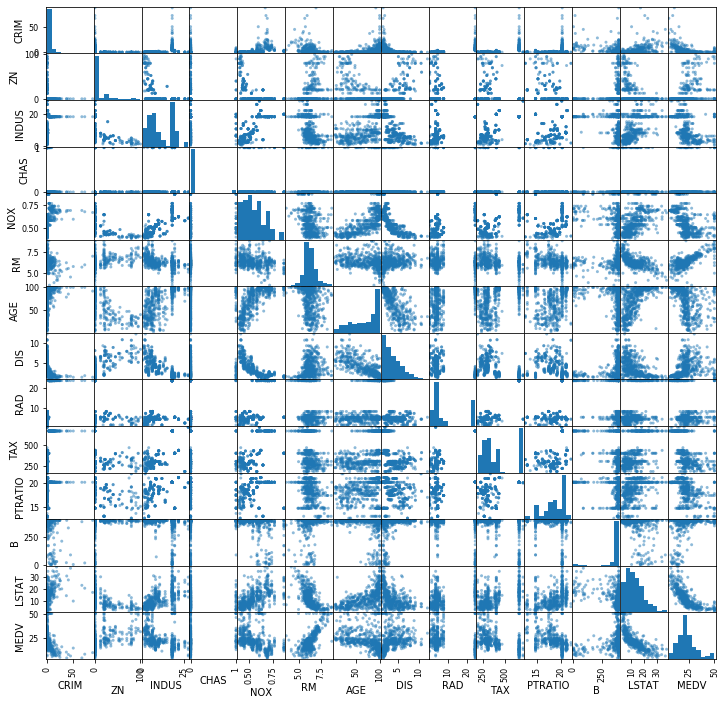

In [144]:
plt.close()
import pandas as pd
from pandas.plotting import scatter_matrix
scatter_matrix(df_crime, figsize=(12,12))
plt.show()

## 5.11 Heatmap
- 데이터가 많은 경우, 표본 하나하나보다 전체적인 양상을 파악할 때, 

- data, column이 많아지면 scatter plot을 직관적으로 이해하기 힘들다.
    - 여러 구역의 데이터 밀도를 시각화 하는 방법
    - hexbin 옵션 사용시, 구역을 정육각형으로 나눌 수 있다.

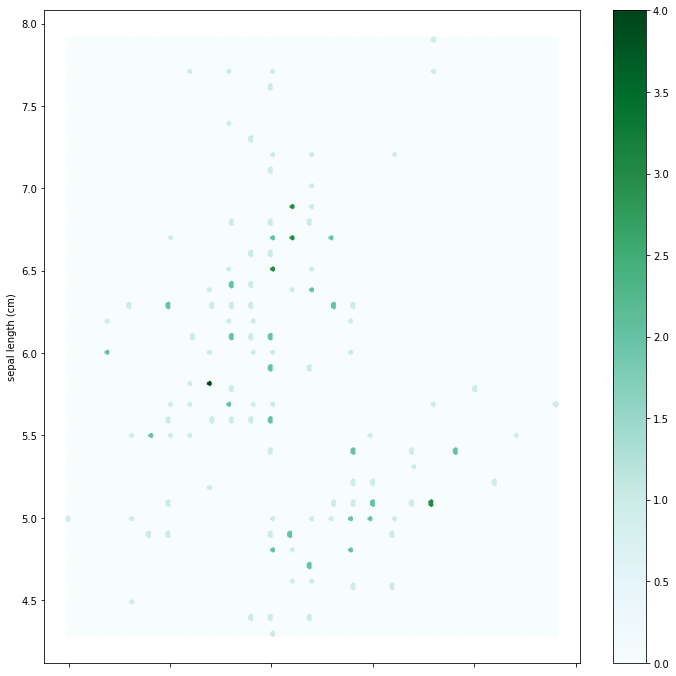

In [147]:
plt.close()
df_iris.plot(kind='hexbin', x='sepal width (cm)', y= 'sepal length (cm)', figsize=(12,12))
plt.show()

## 5.12 Correlation

- 피어슨 상관관계 : Y = mx + b 
    - 양의 상관관계
    - 음의 상관관계
- Corr[X,Y] = Cov[X,Y]/(Std[X]*Std[Y]


- 순서형 상관관계
    - 비모수적(nonparametric) 상관관계 : 특정한 형태로 제한하지 않고, 상관관계를 본다.
        - ex. 키/몸무게 : 키로 정렬한 것, 몸무게로 정렬한 것이 얼마나 비슷한지
    - 세부적인 방법
        - 스피어만(Spearman) : 작은 차이에는 강건하지만, 이상치에 예민
        - 켄들(Kendall) : 이상치에 강건하지만 작은 차이에 예민<br>
        
        
- 어떤 상관계수도 두 변수가 정확히 어떤 관계인지 알려주지 않는다.
- ex. y=sin(x), 상관계수는 거의 0

> 두 변수의 정확한 관계를 알아내려면, 산포도를 그려야 한다.

- 상관계수 해석
    - 0.4 이상 : 상관관계를 생각해볼만하다.
    - 0.7 이상 : 어떤 변수의 변화를 다른 변수로 설명할 수 있는 확률이 50%가 넘는다.
    - 0.95 이상 : 두 변수를 하나로 취급해도 무방, 이럴땐 왜 상관관계가 이렇게 높은지 분석해보자
    
- 상관관계는 인과관계가 아니다.
> 케디의 법칙 : A와 B의 상관관계가 높으면 대체로 둘 중 하나가 다른 하나의 원인이 아니라, 어떤 공통의 외부 요인 C가 존재한다. 


## 5.14 시계열 데이터

- 가장 중요한 것 : 시각화
- 시계열 데이터는 마땅한 대표값이 없다. 따라서 매번 데이터를 직접 보면서 감을 잡는 수밖에 없다.
- 확대, 축소를 자주 해봐야 한다.(급격한 감소처럼 보였던 것이 사실은 곡선인 경우가 많다.)
- 때로는 데이터에 로그를 취하는 것이 필요하다.

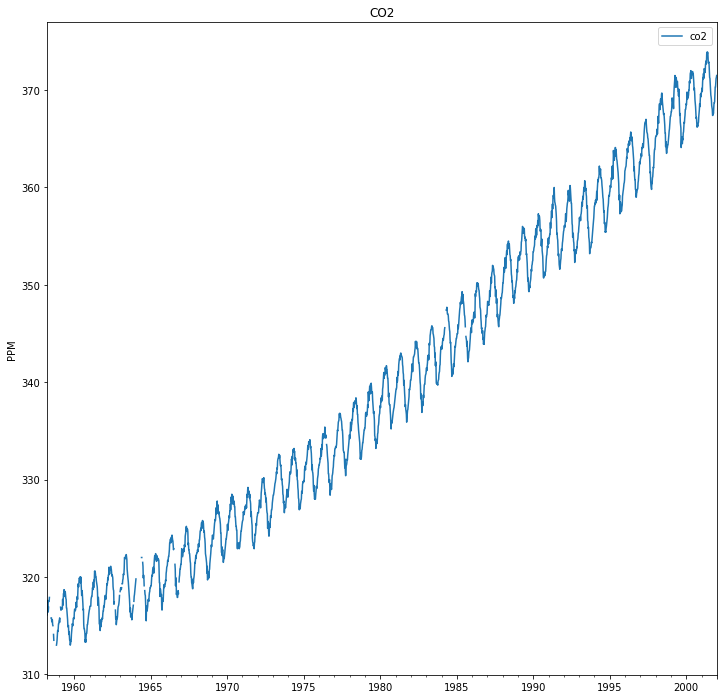

In [151]:
import statsmodels.api as sm

dta = sm.datasets.co2.load_pandas().data
dta.plot(figsize=(12,12))
plt.title('CO2')
plt.ylabel('PPM')
plt.show()

### cf. 사분위수

1. 등위개념 : 첫번째, 두번째, 세번째
    - quartile

2. 백분율 : 25%, 50%, 75%
    - quantile